In [9]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


El equivalente en pies es 317.7523498535156


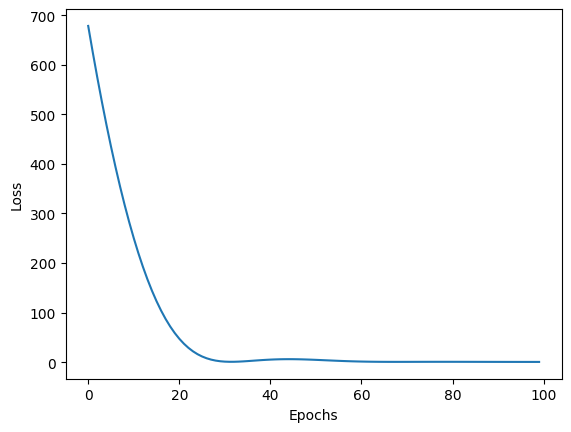

In [10]:

m = np.array([1, 8, 4, 5, 12, 10, 17], dtype=float)
pie = np.array([3.28084, 26.24672, 13.12336, 16.4042, 39.37008, 32.8084, 55.77428], dtype=float)

m = torch.from_numpy(m).view(-1, 1).float()
pie = torch.from_numpy(pie).view(-1, 1).float()

class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearModel()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

epochs = 100
losses = [] # Array to save the losses

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(m)
    loss = criterion(outputs, pie)
    
    loss.backward()
    optimizer.step()

    losses.append(loss.item()) # Save the current loss

model.eval()
m_test = torch.Tensor([100]).view(-1, 1)
pies = model(m_test)

print('El equivalente en pies es ' + str(pies.item()))

# Plotting the loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Parada temprana en la época 37


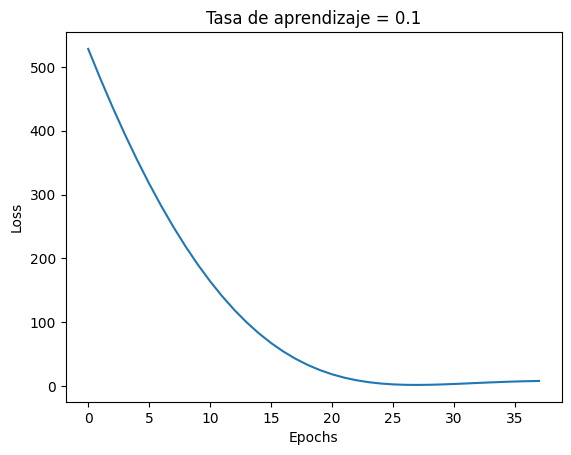

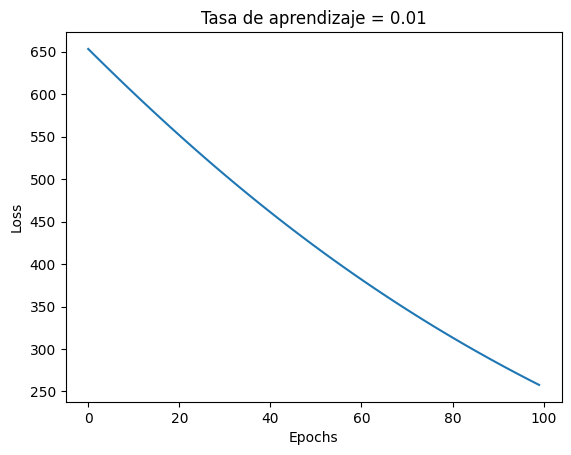

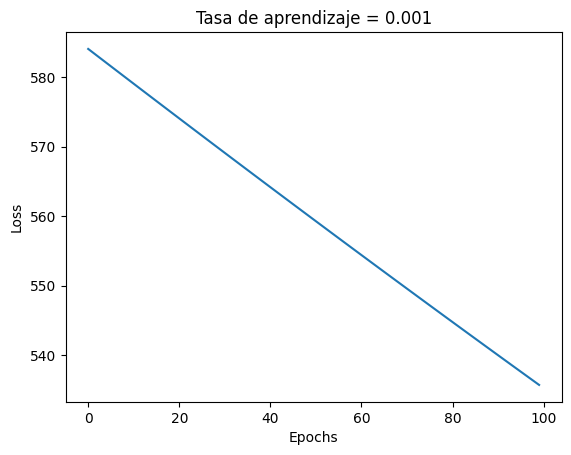

Mejor tasa de aprendizaje: 0.1
El equivalente en pies es 332.3450622558594


In [15]:

class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

criterion = nn.MSELoss()

# Grid Search
learning_rates = [0.1, 0.01, 0.001]
best_loss = float('inf')
best_lr = None
best_model = None

# Early stopping
patience = 10
epochs_no_improve = 0

for lr in learning_rates:
    model = LinearModel()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(m)
        loss = criterion(outputs, pie)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()

        if loss.item() < best_loss:
            best_loss = loss.item()
            epochs_no_improve = 0
            best_model = model
            best_lr = lr
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print(f'Parada temprana en la época {epoch}')
                break
    # Plotting the loss
    plt.plot(range(epoch+1), losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Tasa de aprendizaje = {lr}')
    plt.show()

print(f'Mejor tasa de aprendizaje: {best_lr}')

# Evaluating the best model
best_model.eval()
m_test = torch.Tensor([100]).view(-1, 1)
pies = best_model(m_test)

print('El equivalente en pies es ' + str(pies.item()))
